In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly,
    Derivative
)
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing() 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from pymad_hzb.PlotTools import new_plot_elems_madx
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
from acchamiltoniansandmatrices.Matrices.SymbMatrices import (
    RsymbFODO, 
    RsymbDrift6D, 
    RsymbQuad6D, 
    RsymbQuad6DChroma, 
    RsymbQuad6DThin
)
from acchamiltoniansandmatrices.Matrices.NumpyMatrices import (
    RnpFODO, 
    RnpDrift6D, 
    RnpQuad6D, 
    RnpQuad6DChroma, 
    RnpQuad6DThin
)
from acchamiltoniansandmatrices.Hamiltonians.LatticeElementHamiltonians import (
    HamDrift6D, 
    HamDrift6DParaxialSecondOrder, 
    HamQuad6D, 
    HamQuad6DParaxialSecondOrder, 
    HamQuad6DParaxialSecondOrderChroma,
)
from acchamiltoniansandmatrices.Hamiltonians.Operators import Poisson
from acchamiltoniansandmatrices.Tracking.LinearMatrixTracking import nestList, LinMap, GenerateNDimCoordinateGrid
from acchamiltoniansandmatrices.LieMaps.LieOperator import LieOperator
from acchamiltoniansandmatrices.LieMaps.Poisson import PoissonBracket

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Utils.SymbolicFunctions import SymbolTrick, fixedpoints2D
from acchamiltoniansandmatrices.Utils.Plotting import multi_countour_plot

In [5]:
x, px, y, py, z, delta, eps, h , k0, k1, k2, sigma, betag ,f = symbols('x p_x y p_y z delta epsilon h k_0 k_1 k_2 sigma beta_gamma f', real=True)
L, beta0, gamma0 = symbols(" L beta_0 gamma_0", real=True, positive=True)

In [6]:
A = Function("A", commutative=False)(x,px)
B = Function("B", commutative=False)(x,px)
C = Function("C", commutative=False)(x,px)
D = Function("D", commutative=False)(x,px)
E = Function("E", commutative=False)(x,px)

Aop = LieOperator(A,x,px)
Bop = LieOperator(B,x,px)
Cop = LieOperator(C,x,px)

# accHamiltoniansAndMatrices: Example QF-D lattice

**M. Arlando, J. Frank, T. Mertens**

# Overview

- General assumptions and setup
- Overview of the available Hamiltonians for the drift space
- Exploring the lattice using the simplest drift Hamiltonian (root expanded to first order)
- Exploring the lattice using the drift Hamiltonian to second order 
- Exploring the lattice using the full Hamiltonian
- Explicit numerical examples

# General 

In order to minimize the cluttering of equations the following approximations will be used throughout this notebook:
$$\frac{1}{\beta_0^2\gamma_0^2} \rightarrow 0 \\
\beta_0 \rightarrow 1
$$


For the examples below we use the thin lense approximation for the quadrupole and consider different approximations for the Hamiltonian of the Drift space.

In [7]:
# Define constant number symbols in sympy - otherwise they are considered variables
LQ   = SymbolTrick("L_Q")
LD   = SymbolTrick("L_D")
kq1  = SymbolTrick("K_{Q_1}")
dkq1 = SymbolTrick("\delta{K_{Q_1}}")

# inserting replacements to ignore all planes except x-px
rep = list(zip([delta, px, y, py],[0,0,0,0]))

# Overview Drift Hamiltonians

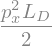

In [8]:
hamd0  = HamDrift6DParaxialSecondOrder(beta0,gamma0,LD,x,px,y,py,delta).subs(delta,0).subs(py,0)
hamd0

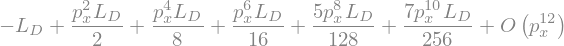

In [10]:
# Series expansion of the Drift Full Hamiltonian
series(HamDrift6D(beta0,gamma0,LD,x,px,y,py,delta).subs(delta,0).subs(py,0).subs(beta0*gamma0,oo).subs(beta0,1),px,0,12)

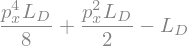

In [11]:
hamd1 = series(HamDrift6D(beta0,gamma0,LD,x,px,y,py,delta).subs(delta,0).subs(py,0).subs(beta0*gamma0,oo).subs(beta0,1),px,0,6).removeO()
hamd1

In [12]:
hamdf  = HamDrift6D(beta0,gamma0,LD,x,px,y,py,delta).subs(delta,0).subs(py,0)
hamdf  = hamdf.subs(beta0*gamma0,oo).subs(beta0,1)
hamdf

<span style="color:darkred">Note that the constants do not matter, this is just a shift.</span>

# Simplest Drift Hamiltonian

## Hamiltonians used

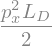

In [13]:
hamd0

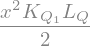

In [15]:
hamq1 = HamQuad6DParaxialSecondOrder(beta0,gamma0,LQ,x,px,y,py,delta,kq1).subs(rep)
hamq1

## BCH Expansions

In [17]:
qdham1 = Aop.BCH(Bop,1).ham.subs(A,hamq1).subs(B,hamd0).doit()
qdham2 = Aop.BCH(Bop,2).ham.subs(A,hamq1).subs(B,hamd0).doit()
qdham3 = Aop.BCH(Bop,3).ham.subs(A,hamq1).subs(B,hamd0).doit()
qdham4 = Aop.BCH(Bop,4).ham.subs(A,hamq1).subs(B,hamd0).doit()

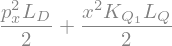

In [18]:
qdham1

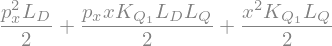

In [19]:
qdham2

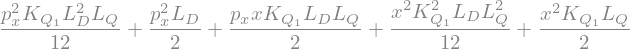

In [20]:
qdham3

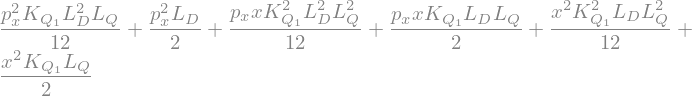

In [21]:
qdham4

## BCH - First order

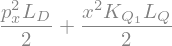

In [22]:
qdham1

**Harmonic Oscillator!!!**

## BCH - Second order

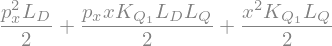

In [23]:
qdham2

Harmonic oscillator with **mixed** term.

Notice:
$$\frac{p_{x}^{2} L_D}{2} + \frac{p_{x} x {\color{orange}{K_{Q_1}}} {\color{red}{L_D}} {\color{blue}{L_Q}}}{2} + \frac{x^{2} K_{Q_1} L_Q}{2}$$

## BCH - Third order

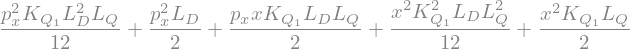

In [24]:
qdham3

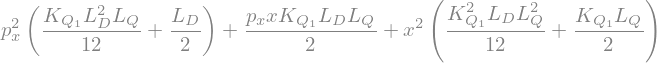

In [25]:
qdham3.collect(x**2).collect(px**2)

Depending on the coefficients and their signs this is an ellipse or hyperbola.

## BCH - Fourth order

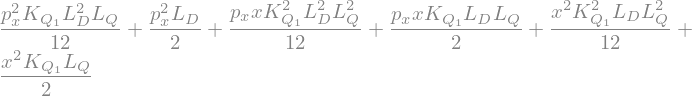

In [27]:
qdham4

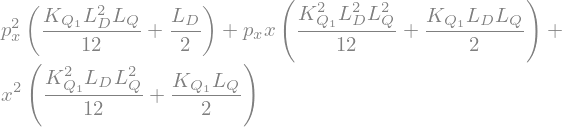

In [28]:
qdham4.collect(x**2).collect(px**2).collect(x*px)

# 4th order expansion Drift Hamiltonian

## Hamiltonians used

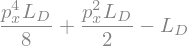

In [41]:
hamd1

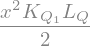

In [42]:
hamq1

## BCH Expansions

In [72]:
qdham1 = Aop.BCH(Bop,1).ham.subs(A,hamq1).subs(B,hamd1).doit()
qdham2 = Aop.BCH(Bop,2).ham.subs(A,hamq1).subs(B,hamd1).doit()
qdham3 = Aop.BCH(Bop,3).ham.subs(A,hamq1).subs(B,hamd1).doit()
qdham4 = Aop.BCH(Bop,4).ham.subs(A,hamq1).subs(B,hamd1).doit()

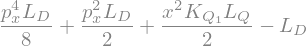

In [73]:
qdham1

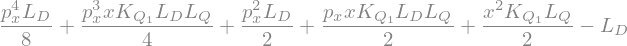

In [74]:
qdham2.expand()

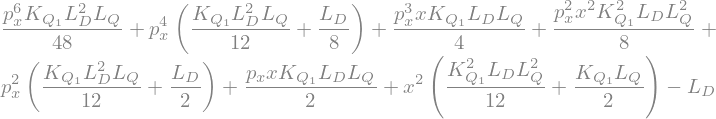

In [93]:
sum([k*v for k,v in Poly(qdham3.expand(),x,px).as_expr().as_coefficients_dict().items()])

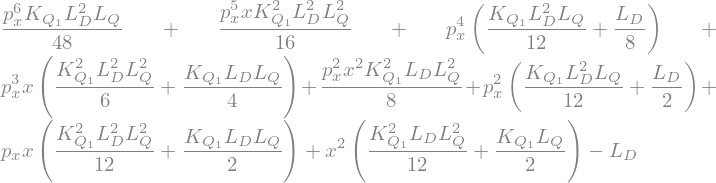

In [94]:
sum([k*v for k,v in Poly(qdham4.expand(),x,px).as_expr().as_coefficients_dict().items()])

Note:

Extra terms shrink the convergence region if they are bigger than 1.

# Full Drift Hamiltonian

## Hamiltonians used

In [95]:
hamdf

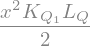

In [96]:
hamq1

## BCH Expansions

In [97]:
qdham1 = Aop.BCH(Bop,1).ham.subs(A,hamq1).subs(B,hamdf).doit()
qdham2 = Aop.BCH(Bop,2).ham.subs(A,hamq1).subs(B,hamdf).doit()
qdham3 = Aop.BCH(Bop,3).ham.subs(A,hamq1).subs(B,hamdf).doit()
qdham4 = Aop.BCH(Bop,4).ham.subs(A,hamq1).subs(B,hamdf).doit()

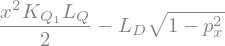

In [98]:
qdham1

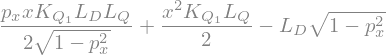

In [99]:
qdham2.expand()

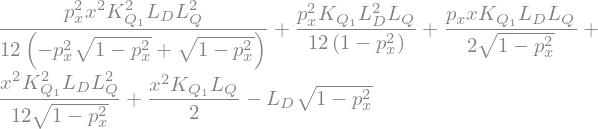

In [101]:
qdham3.expand()

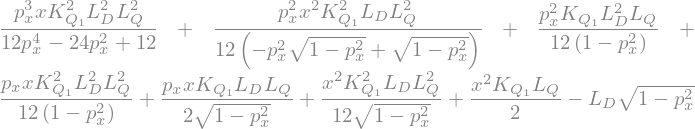

In [102]:
qdham4.expand()

# Explicit examples

## Example 1 

**Unrealistic case** ($px > 1)$. This case is meant to demonstrate the impact on the Hamiltonian surface, and not as a physcial example.

### Simple Drift Hamiltonian

In [164]:
### set some explicit values
k, lq, ld  = (0.1, 1, 4.5)

# load in list to substitute in the symbolic expression
nrep = list(zip([LD,LQ,kq1],[ld,lq,k]))

# reload the coorect Hamiltonians
qdham1 = Aop.BCH(Bop,1).ham.subs(A,hamq1).subs(B,hamd0).doit()
qdham2 = Aop.BCH(Bop,2).ham.subs(A,hamq1).subs(B,hamd0).doit()
qdham3 = Aop.BCH(Bop,3).ham.subs(A,hamq1).subs(B,hamd0).doit()
qdham4 = Aop.BCH(Bop,4).ham.subs(A,hamq1).subs(B,hamd0).doit()

# create numeric functions from the symbolic ones
hoqdham1 = lambdify((x,px),qdham1.subs(nrep),"numpy")
hoqdham2 = lambdify((x,px),qdham2.subs(nrep),"numpy")
hoqdham3 = lambdify((x,px),qdham3.subs(nrep),"numpy")
hoqdham4 = lambdify((x,px),qdham4.subs(nrep),"numpy")

In [5]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


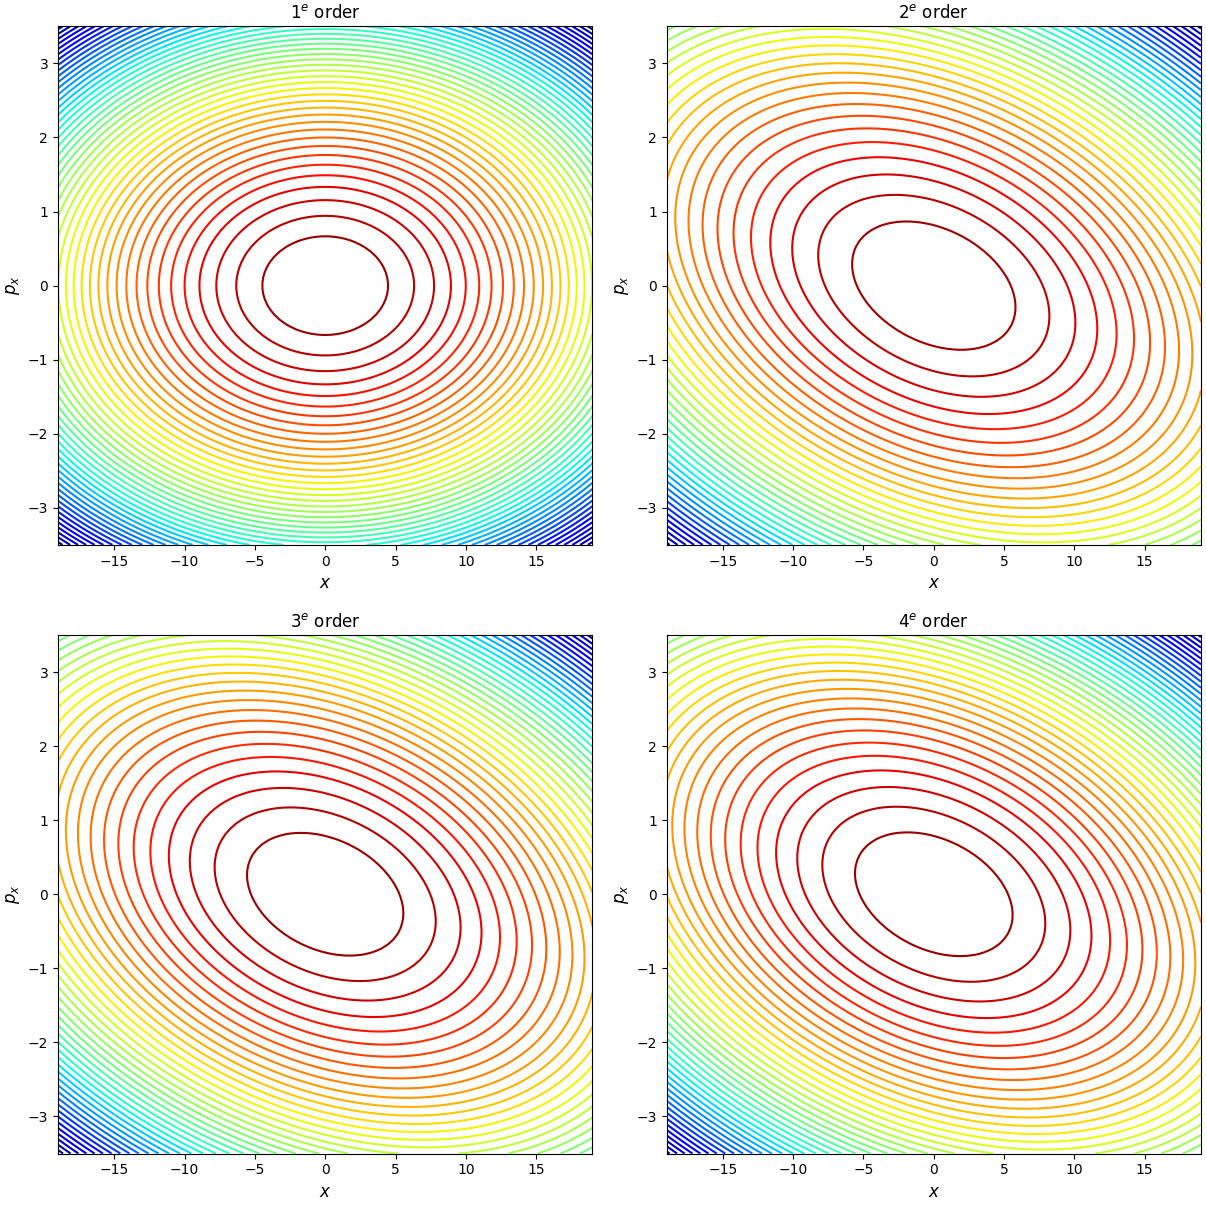

In [166]:
multi_countour_plot(
    [hoqdham1,hoqdham2,hoqdham3,hoqdham4], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=19,
    prange=3.5
)

In [167]:
for ha in [qdham1.subs(nrep),qdham2.subs(nrep),qdham3.subs(nrep),qdham4.subs(nrep)]:
    print(fixedpoints2D(ha,x,px))

{p_x: 0.0, x: 0.0}
{p_x: 0.0, x: 0.0}
{p_x: 0.0, x: 0.0}
{p_x: 0.0, x: 0.0}


### 4th order expansion root for Drift Hamiltonian

In [169]:
# reload the coorect Hamiltonians
qdham1 = Aop.BCH(Bop,1).ham.subs(A,hamq1).subs(B,hamd1).doit()
qdham2 = Aop.BCH(Bop,2).ham.subs(A,hamq1).subs(B,hamd1).doit()
qdham3 = Aop.BCH(Bop,3).ham.subs(A,hamq1).subs(B,hamd1).doit()
qdham4 = Aop.BCH(Bop,4).ham.subs(A,hamq1).subs(B,hamd1).doit()

# create numeric functions from the symbolic ones
hoqdham1 = lambdify((x,px),qdham1.subs(nrep),"numpy")
hoqdham2 = lambdify((x,px),qdham2.subs(nrep),"numpy")
hoqdham3 = lambdify((x,px),qdham3.subs(nrep),"numpy")
hoqdham4 = lambdify((x,px),qdham4.subs(nrep),"numpy")

In [6]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


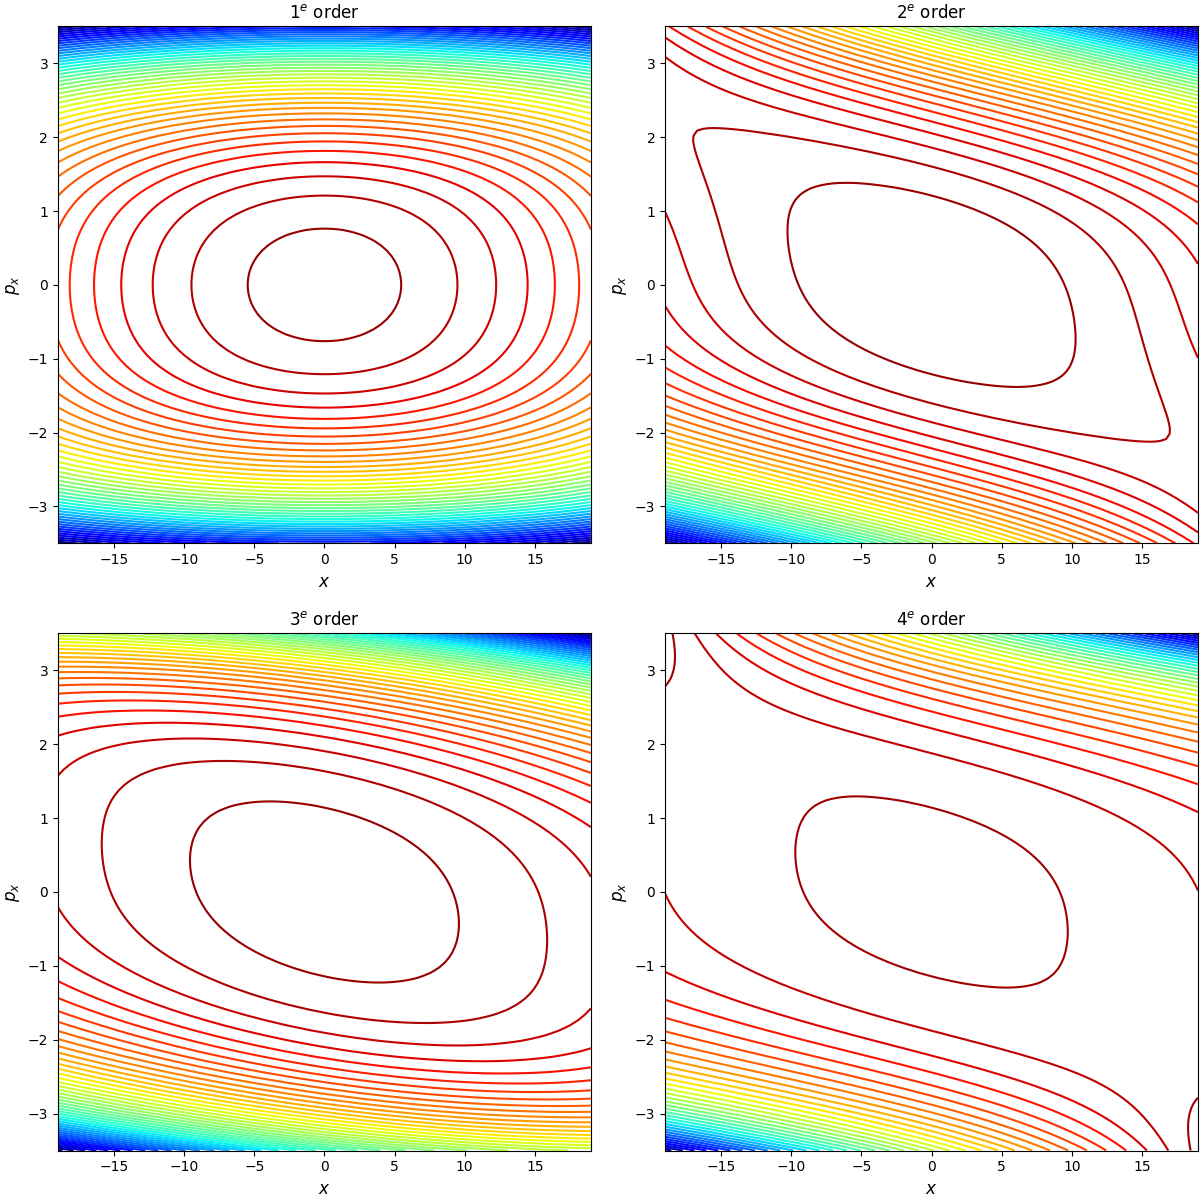

In [171]:
multi_countour_plot(
    [hoqdham1,hoqdham2,hoqdham3,hoqdham4], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=19,
    prange=3.5,
)


In [7]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


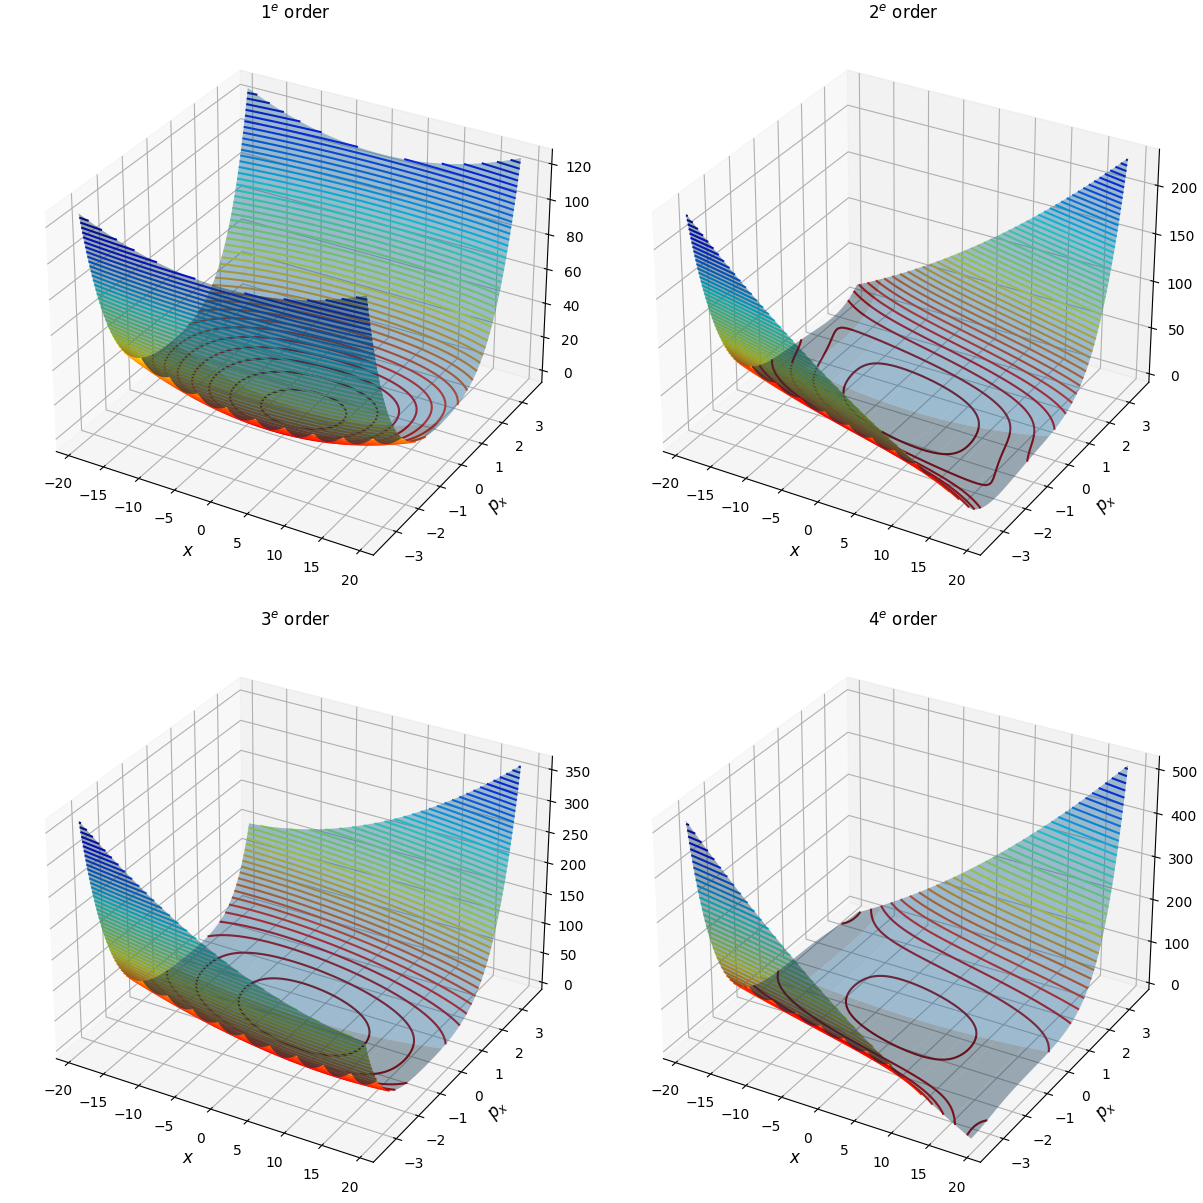

In [173]:
multi_countour_plot(
    [hoqdham1,hoqdham2,hoqdham3,hoqdham4], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=19,
    prange=3.5,
    d3=True
)

In [174]:
for ha in [qdham1.subs(nrep),qdham2.subs(nrep),qdham3.subs(nrep),qdham4.subs(nrep)]:
    print(fixedpoints2D(ha,x,px))

[(0.0, 0.0)]
[(-18.7286778627216, 2.29330749339448), (0.0, 0.0), (18.7286778627216, -2.29330749339448)]
[(0.0, 0.0)]
[(-15.7350555041151, 2.13403664256792), (0.0, 0.0), (15.7350555041151, -2.13403664256792)]


In [8]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


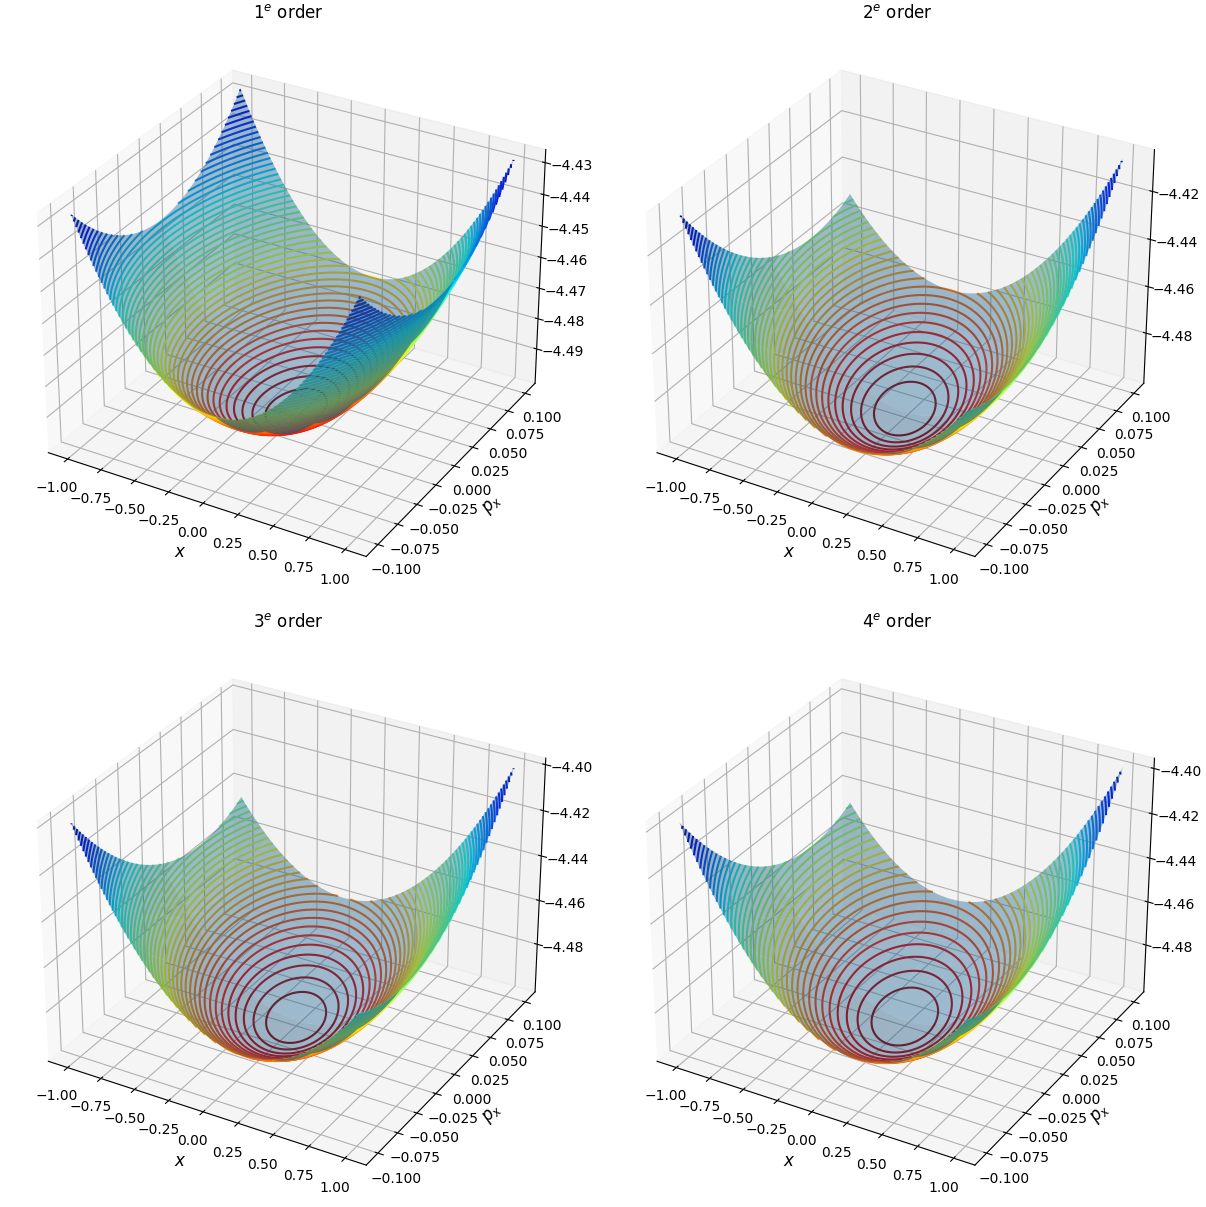

In [176]:
multi_countour_plot(
    [hoqdham1,hoqdham2,hoqdham3,hoqdham4], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=1,
    prange=.1,
    d3=True
)

### Full Drift Hamiltonian

In [183]:
# reload the coorect Hamiltonians
qdham1 = Aop.BCH(Bop,1).ham.subs(A,hamq1).subs(B,hamdf).doit()
qdham2 = Aop.BCH(Bop,2).ham.subs(A,hamq1).subs(B,hamdf).doit()
qdham3 = Aop.BCH(Bop,3).ham.subs(A,hamq1).subs(B,hamdf).doit()
qdham4 = Aop.BCH(Bop,4).ham.subs(A,hamq1).subs(B,hamdf).doit()

# create numeric functions from the symbolic ones
hoqdham1 = lambdify((x,px),qdham1.subs(nrep),"numpy")
hoqdham2 = lambdify((x,px),qdham2.subs(nrep),"numpy")
hoqdham3 = lambdify((x,px),qdham3.subs(nrep),"numpy")
hoqdham4 = lambdify((x,px),qdham4.subs(nrep),"numpy")

In [9]:
hide_toggle(for_next=True)

<IPython.core.display.Javascript object>


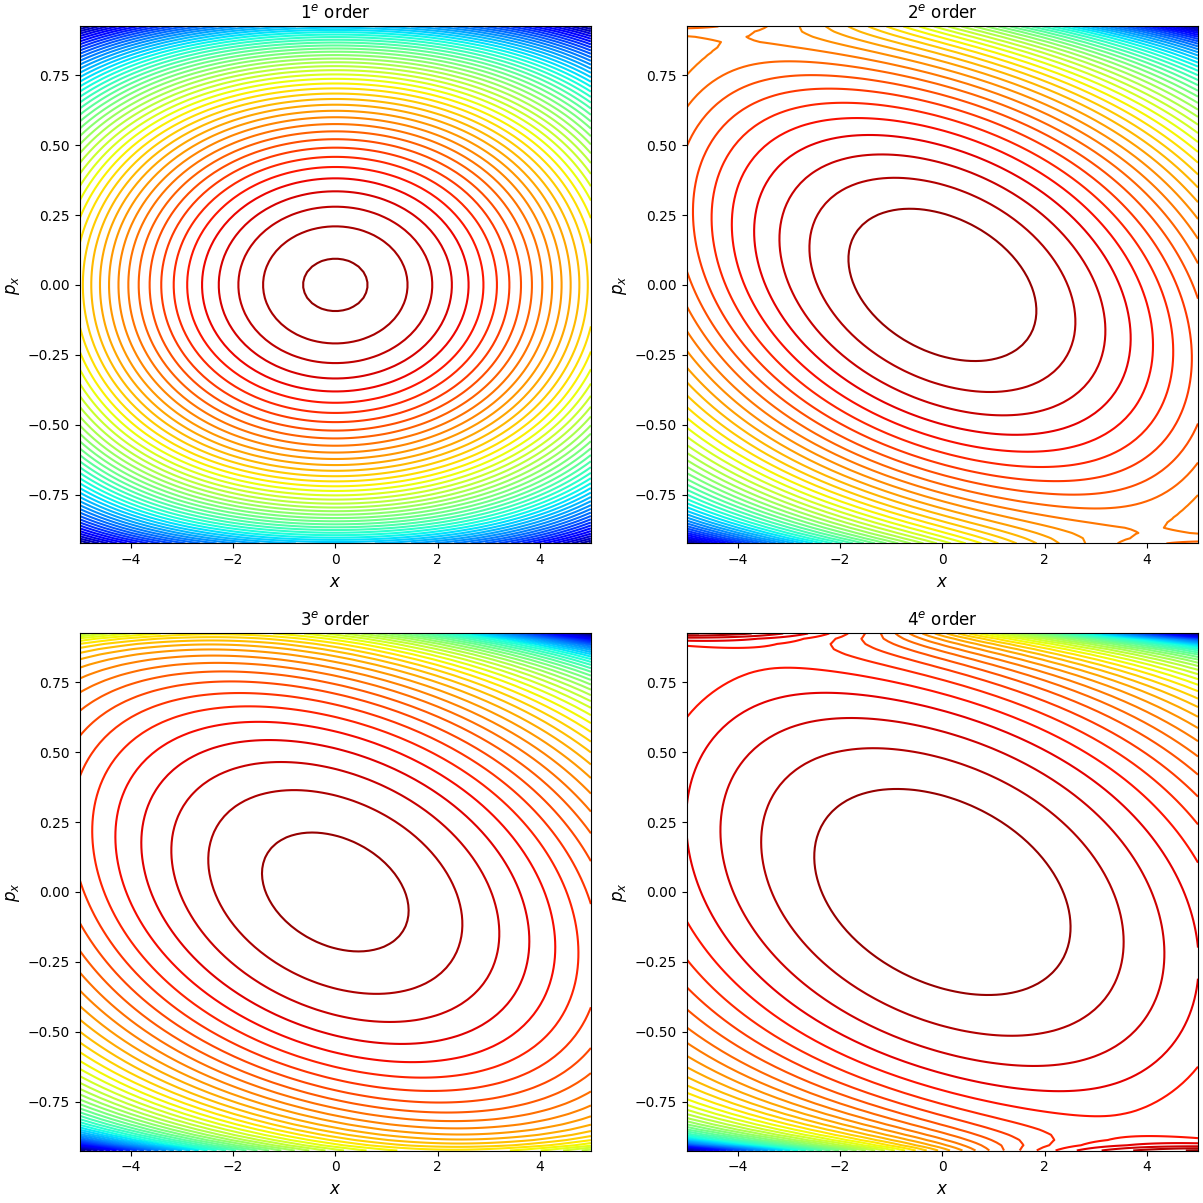

In [179]:
multi_countour_plot(
    [hoqdham1,hoqdham2,hoqdham3,hoqdham4], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=5,
    prange=0.925
)

In [ ]:
# does not seem to converge
for ha in [qdham1.subs(nrep),qdham2.subs(nrep),qdham3.subs(nrep),qdham4.subs(nrep)]:
    print(fixedpoints2D(ha,x,px))

In [198]:
from scipy.optimize import fsolve

for ha in [qdham2,qdham4]:
    fxfp = lambdify((x,px),Derivative(ha.subs(nrep),x).doit(),"numpy")
    fpfp = lambdify((x,px),Derivative(ha.subs(nrep),px).doit(),"numpy")

    def func(m):
        return [fxfp(m[0],m[1]),fpfp(m[0],m[1])]

    print(fsolve(func,[4,-0.8]))

[ 4.08179019 -0.87576113]
[ 3.5621325  -0.84546403]


<span style="color:darkred">**Notice the fixed points moving inwards!!!**</span>